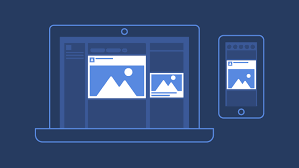





# Step 1: Load the dataset

In [0]:
from google.colab import files
files.upload()

In [0]:
#We load the data
import pandas as pd
df = pd.read_csv('KAG_conversion_data.csv')
df

In [0]:
#Loading Liberary
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
# Understand the datatype 
df.info()

In [0]:
# Get the summary statistic of the dataset
df.describe()

In [0]:
# Check the unique values in the age column
df['age'].unique()

In [0]:
# Check the unique values of the xyz campaign
df['xyz_campaign_id'].unique()

In [0]:
# change the gender and age column to factor
df['gender'] = df['gender'].astype('category')
df['age'] = df['age'].astype('category')
df.head(n=5)

# Step 2: Feature Engineering

To get more insights from the data, I'll create facebook ad metrics to get a better understanding of how well the ads performed.

Click-Through Rate (CTR)

Clicks are defined as the number of times your ad is clicked on. The Click-through Rate metric provides you with the percentage of people who see your ad and click through to your website. The average CTR for Facebook Ads (across all industries) is 0.9%.

Click Conversion (CC)

Click Conversion: Calculated by taking the number of orders and dividing that by the number of total clicks that can be tracked to a conversion during the same time period.

CPM and CPC

These metrics, Cost per Thousand Impressions (CPM) and Cost per Click (CPC), help you to understand how efficient your ad spend is.

CPM refers to the average cost for 1,000 impressions. CPM measures the total amount spent on an ad campaign, multiplied by 1,000 divided by impressions. 

In [0]:
# Feature engineering: Click-Through Rate (CTR)
df['CTR']= df['Clicks']/df['Impressions']

# Feature engineering: (CPC)
df['CPC']= df['Spent'] /df['Clicks']

# Feature engineering: Click Total Conversion (CTC)
df['CTC']= df['Total_Conversion'] /df['Clicks']

# Feature engineering: Click Approved Conversion (CAC)
df['CAC']= df['Approved_Conversion'] /df['Clicks']

# Feature engineering: cost per 1000 impressions(CPM)
df['CPM']= df['Spent'] * 1000 /df['Impressions']

# Remove Nan values from the dataset
df['CTR'] = df['CTR'].fillna(0)
df['CTC'] = df['CTC'].fillna(0)
df['CAC'] = df['CAC'].fillna(0)
df['CPM'] = df['CPM'].fillna(0)
df['CPC'] = df['CPC'].fillna(0)
df.head(n=6)

In [0]:
#Lets use the dataframe.round() function to round off all the decimal values in the dataframe to 3 decimal places.
df.round(3) 


Step 3: Data exploration

In [0]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
print('Total data rows: ' + format(df.shape[0], ",d"))
print('Distinct ad_id: ' + format(df['ad_id'].unique().shape[0], ",d"))
print('Distinct xyz_campaign_id: ' + format(df['xyz_campaign_id'].unique().shape[0], ",d"))
print('Distinct fb_campaign_id: ' + format(df['fb_campaign_id'].unique().shape[0], ",d"))

In [0]:
# Distribution of gender 
df['gender'].value_counts()

In [0]:
# Piechart showing the gender distribution
colors = ['lightcoral', 'lightskyblue']
plt.pie([551, 592], explode = (0.1, 0), labels = ['Female', 'Male'], colors = colors, autopct='%1.1f%%') 
plt.title('Distribution of gender of the person to whom the ad is shown', fontsize=15)
plt.gcf().set_size_inches(8, 8)
plt.show()

It can be seen that there is no significant difference in gender distribution for the ads

In [0]:
# Analysis of age 
df['age'].value_counts() 

In [0]:
#Plot the data:
my_c = list('rgbkymc')  #red, green, blue, black, etc.
# the barchart
cax = df['age'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name", color=my_c)
cax.set_xlabel("Owner Names")
cax.set_ylabel("Frequency")
plt.show()

In [0]:
# using pivot 
pivot_df = pd.pivot_table(df, values='Clicks', 
                    index=['age'], 
                    columns='gender',
                    aggfunc='count')
pivot_df


In [0]:
#Note: .loc[:,['F','M']] is used here to rearrange the layer ordering
pivot_df.loc[:,['F','M']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [0]:
# Analysis of xyz_campaign_id
df['xyz_campaign_id'].value_counts() 

In [0]:
# Piechart showing the xyz_campaign_id distribution
colors = ['lightcoral', 'lightskyblue','purple']
plt.pie([625,464,54], explode = (0.1, 0,0.2), labels = ['1178','936','916'], colors = colors, autopct='%1.1f%%') 
plt.title('Distribution of xyz_campaign_id', fontsize=15)
plt.gcf().set_size_inches(8, 8)
plt.show()

In [0]:
# using pivot 
pivot_dfx = pd.pivot_table(df, values='Clicks', 
                    index=['xyz_campaign_id'], 
                    columns='gender',
                    aggfunc='count')
pivot_dfx


In [0]:
#Note: .loc[:,['F','M']] is used here to rearrange the layer ordering
pivot_dfx.loc[:,['F','M']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [0]:
# using pivot 
pivot_dfxx = pd.pivot_table(df, values='Clicks', 
                    index=['xyz_campaign_id'], 
                    columns='age',
                    aggfunc='count')
pivot_dfxx

In [0]:
#Note: .loc[:,['30-34','35-39','40-44','45-49']] is used here to rearrange the layer ordering
pivot_dfxx.loc[:,['30-34','35-39','40-44','45-49']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [0]:
sns.boxplot(x='xyz_campaign_id', y='Spent', data=df)
